In [11]:
#%% Importing
from  funcs import *
import numpy as np
import matplotlib.pylab as plt
from scipy import signal
import seaborn as sns
import pandas as pd

In [12]:
#%% Initiation
main_dir = r'D:\University\Khaje\Semester 1\Neuromuscular\Assymetry Project\daaataaaa\All'
file_names = os.listdir(main_dir)

In [13]:
df = pd.read_excel(os.path.join(main_dir,file_names[7]), header=1)

In [14]:
file_names

['brace fast_Joints_Kinematics.xlsx',
 'brace normal_Joints_Kinematics.xlsx',
 'brace weight fast_Joints_Kinematics.xlsx',
 'brace weight normal_Joints_Kinematics.xlsx',
 'Wakling normal_Joints_Kinematics.xlsx',
 'walking fast_Joints_Kinematics.xlsx',
 'weight fast_Joints_Kinematics.xlsx',
 'weight normal_Joints_Kinematics.xlsx']

In [15]:
df = pd.read_excel(os.path.join(main_dir,file_names[0]), header=1)

In [16]:
df

,RightHip_Time,RightHip_Abduction-Adduction,RightHip_Internal-External Rotat,RightHip_Flexion-Extension,LeftShoulder_Time,LeftShoulder_Abduction-Adduction,LeftShoulder_Internal-External Rotat,LeftShoulder_Flexion-Extension,RightShoulder_Time,RightShoulder_Abduction-Adduction,...,LeftHip_Internal-External Rotat,LeftHip_Flexion-Extension,RightAnkle_Time,RightAnkle_Abduction-Adduction,RightAnkle_Internal-External Rotat,RightAnkle_Flexion-Extension,LeftAnkle_Time,LeftAnkle_Abduction-Adduction,LeftAnkle_Internal-External Rotat,LeftAnkle_Flexion-Extension
0,254403,-2.059231,20.544484,-4.393238,254403,-5.308551,-61.341742,3.905030,254403,-2.119546,...,-18.376024,0.840305,254403,0.645748,17.907830,-0.562399,254403,2.201472,-15.999391,-3.544932
1,254409,-2.039962,20.557440,-4.399209,254409,-5.295008,-61.316556,3.918053,254409,-2.103434,...,-18.378295,0.840875,254409,0.665835,17.927843,-0.566914,254409,2.215687,-16.007320,-3.551448
2,254415,-2.020533,20.571043,-4.407936,254415,-5.267304,-61.281488,3.931139,254415,-2.072729,...,-18.409197,0.827441,254415,0.684267,17.948134,-0.569308,254415,2.263926,-16.032442,-3.564957
3,254421,-1.995142,20.588525,-4.418874,254421,-5.268354,-61.264887,3.936789,254421,-2.073092,...,-18.350233,0.837558,254421,0.698452,17.965962,-0.571785,254421,2.311191,-16.057776,-3.576170
4,254427,-1.971797,20.603148,-4.431546,254427,-5.270430,-61.253488,3.938213,254427,-2.071466,...,-18.293476,0.846774,254427,0.714201,17.982943,-0.575624,254427,2.313176,-16.062123,-3.575482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6394,292766,0.416470,5.541789,-11.702039,292766,-11.187422,-46.318389,-18.250839,292766,7.870304,...,-17.657329,-18.357646,292766,-1.974311,-24.171612,3.746401,292766,4.307003,15.799183,4.162250
6395,292772,0.821438,5.963035,-11.007131,292772,-10.991225,-46.358233,-17.968481,292772,7.474485,...,-17.226707,-17.876867,292772,-1.171924,-24.085149,5.560855,292772,4.127430,15.869853,3.266611
6396,292778,1.198213,6.393711,-10.318424,292778,-10.745569,-46.359219,-17.585368,292778,7.102008,...,-16.734710,-17.278722,292778,-0.531134,-23.735602,7.439481,292778,4.321734,16.408488,2.824078
6397,292784,1.573576,6.795259,-9.656930,292784,-10.448508,-46.318370,-17.100623,292784,6.751714,...,-16.359578,-16.693328,292784,0.054700,-23.232924,9.197941,292784,4.770647,17.359840,2.724412


In [8]:
# Creating gaitData obejct out of the main dataframe
test_df = gaitData(df)
test_df.detrend()

In [17]:
# Extracting limits
cycle_lim = lim_ex(test_df)
cycle_lim_r = lim_ex_r(test_df)

In [18]:
# Segmentation
cycles = Cycles(test_df, cycle_lim)
cycles_r = Cycles(test_df, cycle_lim_r)

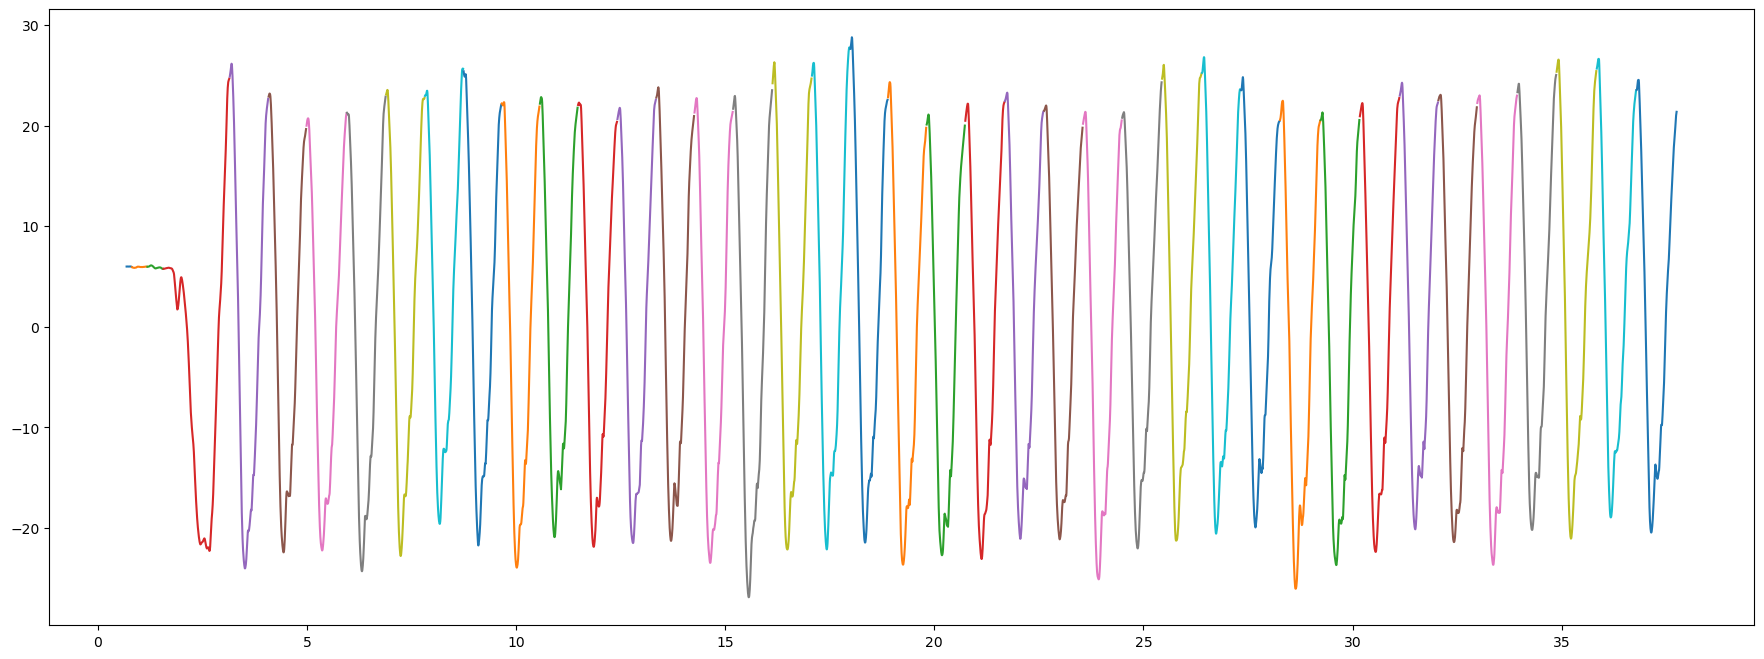

In [19]:
#%% Plotting
x = cycles.left_hip.sagittal
t = cycles.left_hip.time
plt.figure(figsize=(22,8))
for i in range(len(x)):
    
    plt.plot(t[i],x[i])


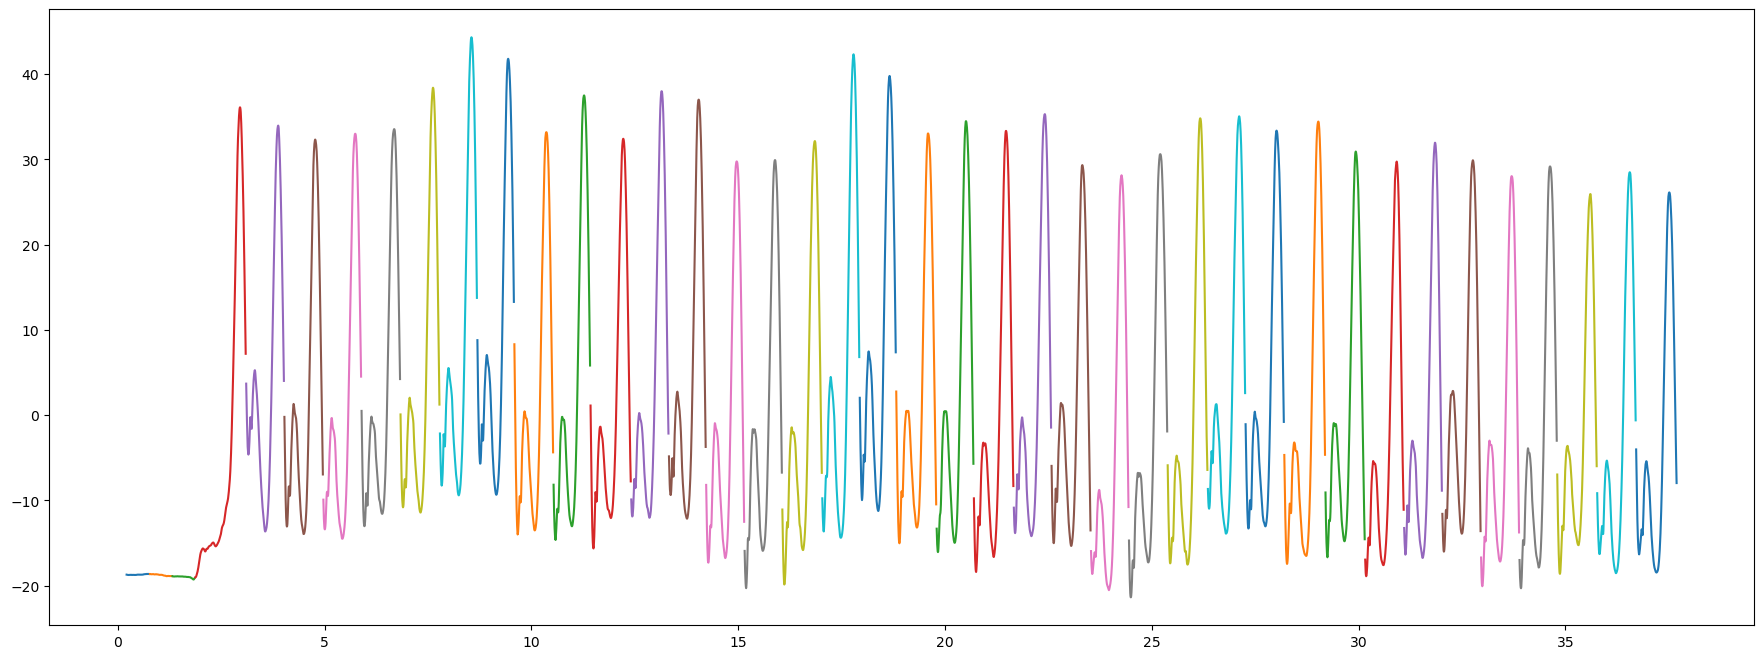

In [20]:
# Right segmentation

x = cycles_r.right_knee.sagittal
t = cycles_r.right_knee.time
plt.figure(figsize=(22,8))
for i in range(len(x)):
    
    plt.plot(t[i],x[i])


# Ankle Compare

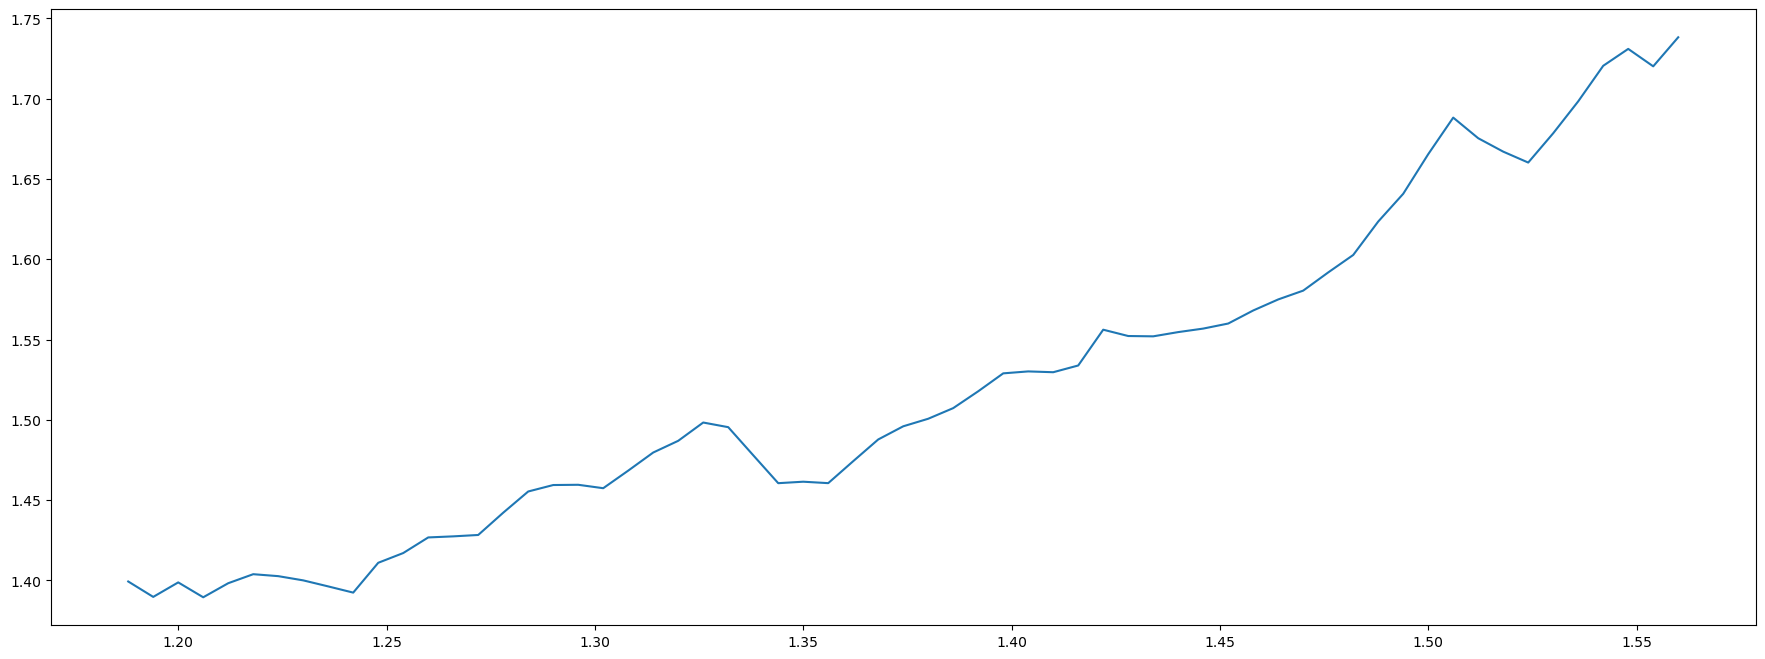

In [32]:
Xr = cycles.right_ankle.iloc[2].frontal
Tr = cycles.right_ankle.iloc[2].time
Xl = cycles.left_ankle.iloc[2].frontal
Tl = cycles.left_ankle.iloc[2].time
plt.figure(figsize=(22,8))
plt.plot(Tr,Xr)
#plt.plot(Tl,Xl)

# Hip Compare

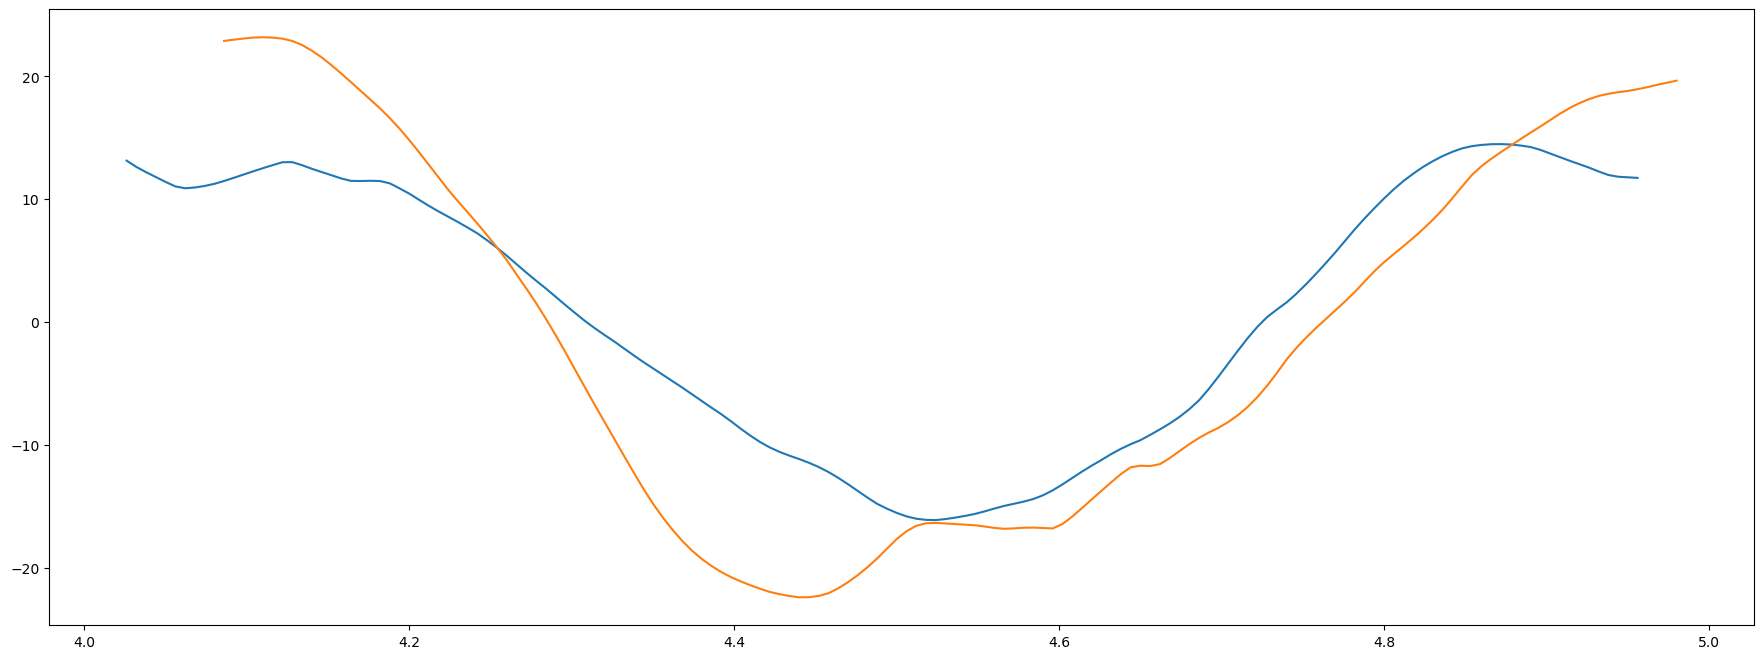

In [23]:
Xr = cycles_r.right_hip.iloc[5].sagittal
Tr = cycles_r.right_hip.iloc[5].time
Xl = cycles.left_hip.iloc[5].sagittal
Tl = cycles.left_hip.iloc[5].time
plt.figure(figsize=(22,8))
plt.plot(Tr,Xr)
plt.plot(Tl,Xl)

# Knee Compare

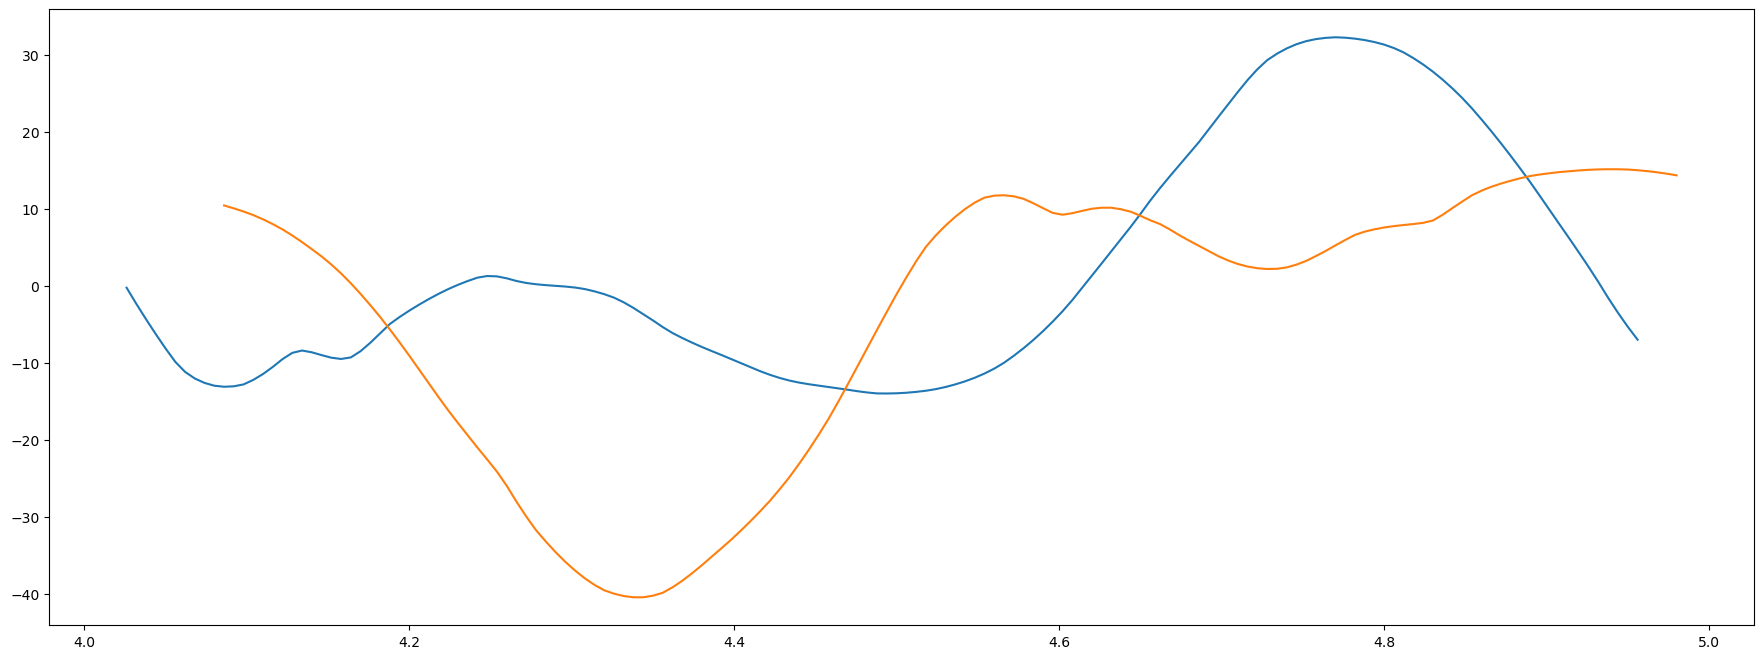

In [25]:
Xr = cycles_r.right_knee.iloc[5].sagittal
Tr = cycles_r.right_knee.iloc[5].time
Xl = cycles.left_knee.iloc[5].sagittal
Tl = cycles.left_knee.iloc[5].time
plt.figure(figsize=(22,8))
plt.plot(Tr,Xr)
plt.plot(Tl,Xl)

# Shoulder Compare

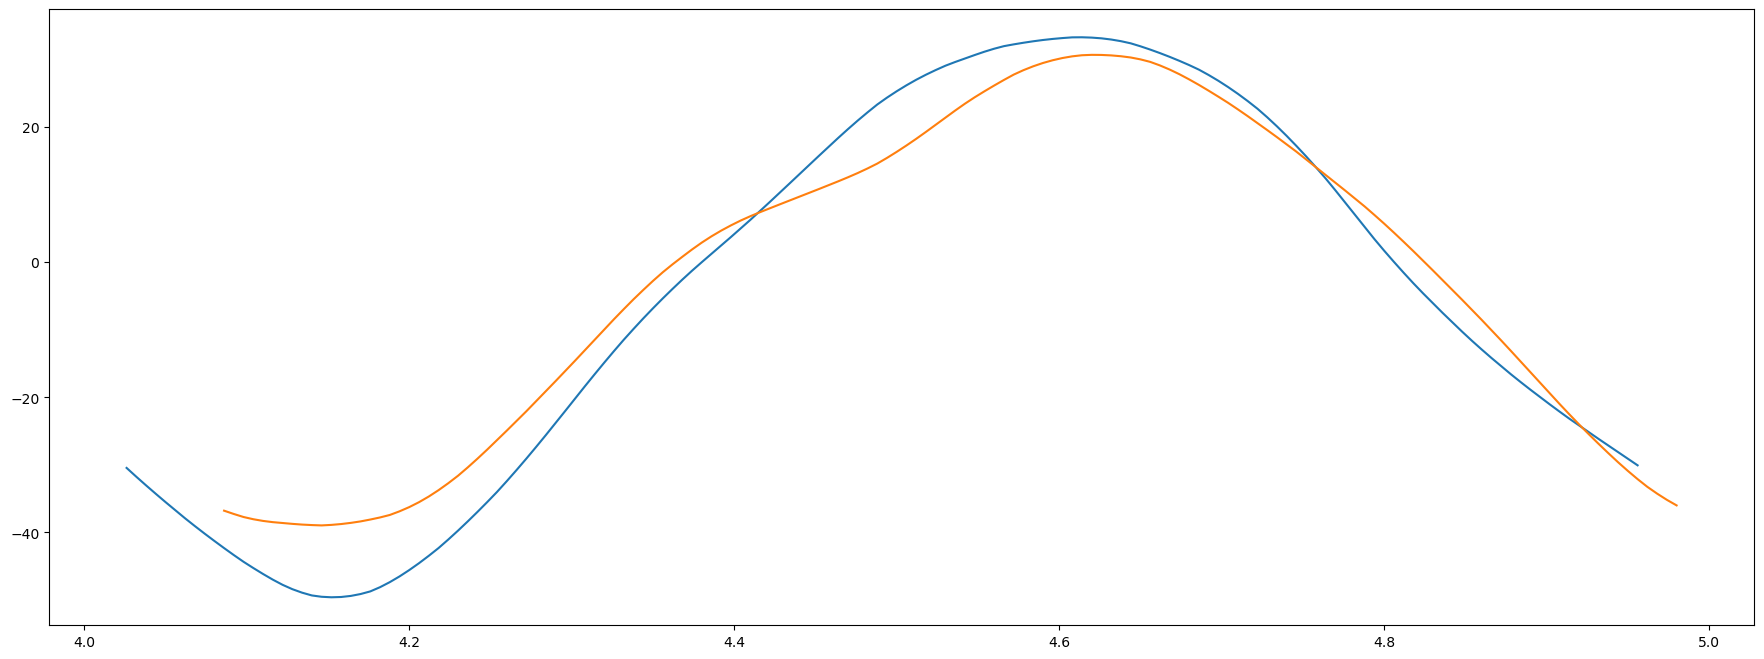

In [27]:
Xr = cycles_r.right_shoulder.iloc[5].sagittal
Tr = cycles_r.right_shoulder.iloc[5].time
Xl = -cycles.left_shoulder.iloc[5].sagittal
Tl = cycles.left_shoulder.iloc[5].time
plt.figure(figsize=(22,8))
plt.plot(Tr,Xr)
plt.plot(Tl,Xl)

In [95]:
cycles.limits

[(25, 50),
 (51, 311),
 (312, 486),
 (487, 660),
 (661, 837),
 (838, 1009),
 (1010, 1183),
 (1184, 1354),
 (1355, 1524),
 (1525, 1702),
 (1703, 1875),
 (1876, 2047),
 (2048, 2225),
 (2226, 2398),
 (2399, 2567),
 (2568, 2744),
 (2745, 2916),
 (2917, 3093),
 (3094, 3265),
 (3266, 3432),
 (3433, 3607),
 (3608, 3779),
 (3780, 3953),
 (3954, 4129),
 (4130, 4299),
 (4300, 4470),
 (4471, 4646),
 (4647, 4822),
 (4823, 4995),
 (4996, 5165),
 (5166, 5335),
 (5336, 5505),
 (5506, 5671),
 (5672, 5843),
 (5844, 6017),
 (6018, 6190),
 (6191, 6368),
 (6369, 6540),
 (6541, 6712),
 (6713, 6885),
 (6886, 7057),
 (7058, 7227),
 (7228, 7407),
 (7408, 7573)]

In [97]:
cycles.right_shoulder.iloc[5]

time          838     5.028
839     5.034
840     5.040
841 ...
frontal       838    -5.419777
839    -5.517671
840    -5.59...
horizontal    838    -0.418750
839    -0.167043
840     0.10...
sagittal      838    -11.790313
839    -12.301566
840    -12...
Name: 5, dtype: object